In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Car_Insurance_Claim.csv') #reading database
df.info() #also print out Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [3]:
df.head() #show the abstract database

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
#i will not use ID, POSTAL_CODE for predictions, so i remove these columns
df.drop(["ID"], axis = 1, inplace = True)
df.drop(["POSTAL_CODE"], axis = 1, inplace = True)

In [5]:
df.head() #check

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


In [6]:
df.isnull().sum().sum() # count how many null values there are

1939

In [7]:
df.isnull().sum() # credit_score and annual_mileage has null values

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [8]:
np.mean(df["CREDIT_SCORE"]) #check mean value for credit score

0.5158128096027941

In [9]:
np.mean(df["ANNUAL_MILEAGE"]) #check mean value for annual mileage

11697.003206900365

In [10]:
df["CREDIT_SCORE"] = df["CREDIT_SCORE"].fillna(np.mean(df["CREDIT_SCORE"]))
df["ANNUAL_MILEAGE"] = df["ANNUAL_MILEAGE"].fillna(int(np.mean(df["ANNUAL_MILEAGE"])))
#fill null values with mean

In [11]:
df.isnull().sum() #check if all null values were filled in

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [12]:
#this block is to transform the values to be suitable for training purposes
df["GENDER"] = LabelEncoder().fit_transform(df["GENDER"])
df["VEHICLE_TYPE"] = LabelEncoder().fit_transform(df["VEHICLE_TYPE"])
df["VEHICLE_YEAR"] = LabelEncoder().fit_transform(df["VEHICLE_YEAR"])
df["AGE"] = LabelEncoder().fit_transform(df["AGE"])
df["DRIVING_EXPERIENCE"] = LabelEncoder().fit_transform(df["DRIVING_EXPERIENCE"])
df["EDUCATION"] = LabelEncoder().fit_transform(df["EDUCATION"])
df["INCOME"] = LabelEncoder().fit_transform(df["INCOME"])
df["RACE"] = LabelEncoder().fit_transform(df["RACE"])

In [13]:
df.info() #check dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int32  
 1   GENDER               10000 non-null  int32  
 2   RACE                 10000 non-null  int32  
 3   DRIVING_EXPERIENCE   10000 non-null  int32  
 4   EDUCATION            10000 non-null  int32  
 5   INCOME               10000 non-null  int32  
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  int32  
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  ANNUAL_MILEAGE       10000 non-null  float64
 12  VEHICLE_TYPE         10000 non-null  int32  
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

In [14]:
df.head() #processed dataset

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,0,0,0,2,0.629027,1.0,0,0.0,1.0,12000.0,0,0,0,0,0.0
1,0,1,0,0,1,1,0.357757,0.0,1,0.0,0.0,16000.0,0,0,0,0,1.0
2,0,0,0,0,0,3,0.493146,1.0,1,0.0,0.0,11000.0,0,0,0,0,0.0
3,0,1,0,0,2,3,0.206013,1.0,1,0.0,1.0,11000.0,0,0,0,0,0.0
4,1,1,0,1,1,3,0.388366,1.0,1,0.0,0.0,12000.0,0,2,0,1,1.0


In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[ : , : -1], df.iloc[ : , -1], train_size = .6, random_state = 1)
#prepare dataset for training
#included scaler as it gives better accuracy
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [16]:
#logistic regression
model = LogisticRegression(max_iter=2000)
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("accuracy of logistic regression is: ",accuracy_score(y_test, predicted))
a1=accuracy_score(y_test, predicted)

accuracy of logistic regression is:  0.8445


Confusion matrix

 [[2463  303]
 [ 319  915]]


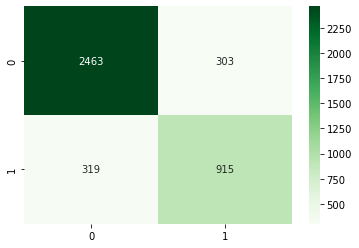

In [17]:
#confusion matrix for logistic regression
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cf_matrix)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Greens')
a2=cf_matrix

In [18]:
#classification report for logistic regression model
print(classification_report(y_test, y_pred))
a3=classification_report(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2766
         1.0       0.75      0.74      0.75      1234

    accuracy                           0.84      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.84      0.84      0.84      4000



In [19]:
#cross validation for logistic regression model
score = cross_val_score(model, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(score))
print('Average cross-validation score: {:.3f}'.format(score.mean()))
a4=score

Cross-validation scores:[0.8425     0.84833333 0.8375     0.85166667 0.81166667]
Average cross-validation score: 0.838


In [20]:
#knn classifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train, y_train)
predicted=model.predict(x_test)
a5=accuracy_score(y_test, predicted)

In [21]:
print("Accuracy of knn is: ", accuracy_score(y_test, predicted))

Accuracy of knn is:  0.811


Confusion matrix

 [[2427  339]
 [ 417  817]]


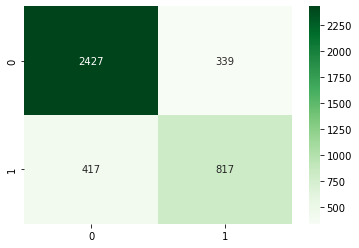

In [22]:
#confusion matrix for knn
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cf_matrix)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Greens')
a6=cf_matrix

In [23]:
#classification report for knn model
print(classification_report(y_test, y_pred))
a7=classification_report(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      2766
         1.0       0.71      0.66      0.68      1234

    accuracy                           0.81      4000
   macro avg       0.78      0.77      0.77      4000
weighted avg       0.81      0.81      0.81      4000



In [24]:
#cross validation for knn model
score = cross_val_score(model, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(score))
print('Average cross-validation score: {:.3f}'.format(score.mean()))
a8=score

Cross-validation scores:[0.79       0.815      0.8        0.79416667 0.79583333]
Average cross-validation score: 0.799


In [25]:
#neural network
model = MLPClassifier(random_state=0)
model.fit(x_train, y_train)
score= model.score(x_test, y_test)
a9=score
print('Testing score: {:.3f}'.format(score))
score = model.score(x_train, y_train)
a10=score
print("Training score: {:.3f}".format(score))

Testing score: 0.833
Training score: 0.868


Confusion matrix

 [[2440  326]
 [ 342  892]]


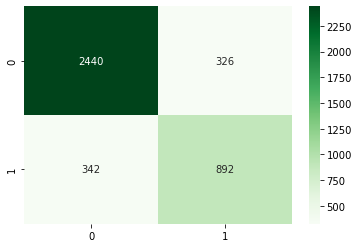

In [26]:
#confusion matrix for neural network model
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cf_matrix)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Greens')
a11=cf_matrix

In [27]:
#classification report for neural network model
print(classification_report(y_test, y_pred))
a12=classification_report(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      2766
         1.0       0.73      0.72      0.73      1234

    accuracy                           0.83      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.83      0.83      0.83      4000



In [28]:
#cross validation for neural network model
score = cross_val_score(model, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(score))
print('Average cross-validation score: {:.3f}'.format(score.mean()))
a13=score

Cross-validation scores:[0.81166667 0.83833333 0.825      0.83083333 0.8125    ]
Average cross-validation score: 0.824


In [29]:
#simplified view for evaluation
print("---Evaluation---")
print("Accuracy:")
print("Accuracy of logistic regression is: ",a1)
print("Accuracy of knn is: ", a5)
print('Neural network Testing score: {:.3f}'.format(a9))
print("Neural network Training score: {:.3f}".format(a10))
print("----------------")
print("Confusion matrix")
print("Logistic regression")
print(a2)
print("KNN classifier")
print(a6)
print("Neural network")
print(a11)
print("----------------")
print("Classification report")
print("Logistic regression")
print(a3)
print("KNN classifier")
print(a7)
print("Neural network")
print(a12)
print("----------------")
print("Cross validation")
print("Logistic regression")
print(a4)
print(a4.mean())
print("KNN classifier")
print(a8)
print(a8.mean())
print("Neural network")
print(a13)
print(a13.mean())
print("----------------")

---Evaluation---
Accuracy:
Accuracy of logistic regression is:  0.8445
Accuracy of knn is:  0.811
Neural network Testing score: 0.833
Neural network Training score: 0.868
----------------
Confusion matrix
Logistic regression
[[2463  303]
 [ 319  915]]
KNN classifier
[[2427  339]
 [ 417  817]]
Neural network
[[2440  326]
 [ 342  892]]
----------------
Classification report
Logistic regression
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2766
         1.0       0.75      0.74      0.75      1234

    accuracy                           0.84      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.84      0.84      0.84      4000

KNN classifier
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      2766
         1.0       0.71      0.66      0.68      1234

    accuracy                           0.81      4000
   macro avg       0.78      0.77      0.77  